In [ ]:
from sklearn.datasets import load_iris
# Import necessary library
# Load the Iris dataset
iris = load_iris()
# convert to dataframe
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
# Drop rows where the target is 2
df = df[df['target'] != 2]

# Above code is for loading dataset. Ignore.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)


In [3]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[12  0]
 [ 0  8]]


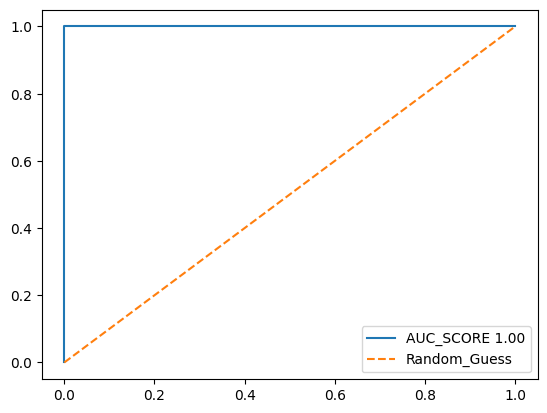

In [4]:
# ROC AUC Curve plot 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba=model.predict_proba(X_test)[:,1]

fpr,tpr,_=roc_curve(y_test,y_pred_proba)

auc_score=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'AUC_SCORE {auc_score:.2f}')
plt.plot([0,1],[0,1],label='Random_Guess',linestyle='--')
plt.legend()


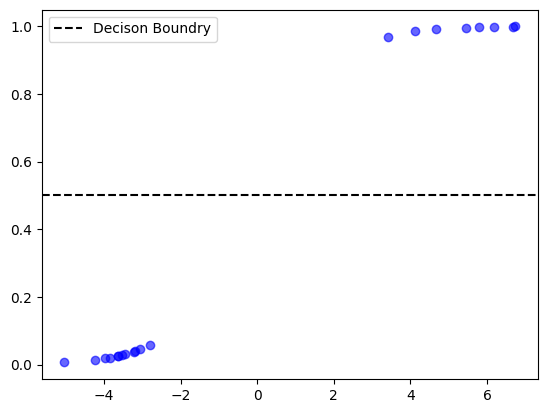

In [5]:
import numpy as np
Z_val=model.intercept_+np.dot(X_test,model.coef_.T)
sig_val=1/(1+np.exp(-Z_val))
plt.scatter(Z_val,sig_val,alpha=0.6,color='blue')
plt.axhline(0.5,linestyle='--',color='black',label='Decison Boundry')
plt.legend()